In [1]:
import cv2
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

yolo_model = YOLO("yolov8n-face.pt")
model = tf.keras.models.load_model("gender_classification_model.h5")

def preprocess_face(face, img_size=(64, 64)):
    face = cv2.resize(face, img_size)
    face = face.astype(np.float32) / 255.0
    face = np.expand_dims(face, axis=0)
    return face

def detect_and_classify(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unable to read")

    results = yolo_model.predict(img)[0]

    total_faces = 0
    male_count, female_count = 0, 0

    for box in results.boxes:
        x_min, y_min, x_max, y_max = map(int, box.xyxy[0].tolist())
        confidence = box.conf[0].item()

        face = img[y_min:y_max, x_min:x_max]
        if face.shape[0] == 0 or face.shape[1] == 0:
            continue

        total_faces += 1
        processed_face = preprocess_face(face)
        prediction = model.predict(processed_face)

        gender_labels = ["Male", "Female"]
        predicted_label = gender_labels[np.argmax(prediction)]
        confidence_score = np.max(prediction) * 100

        if predicted_label == "Male":
            male_count += 1
        else:
            female_count += 1

        color = (255, 255, 0) if predicted_label == "Male" else (255, 0, 255)

        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(img, f"{predicted_label} ({confidence_score:.2f}%)",
                    (x_min, y_min - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    if total_faces > 0:
        print(f"Total Faces Detected: {total_faces}")
        print(f"Male Predictions: {male_count}")
        print(f"Female Predictions: {female_count}")
    else:
        print("No faces detected.")


0: 480x640 10 faces, 248.4ms
Speed: 20.7ms preprocess, 248.4ms inference, 23.8ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


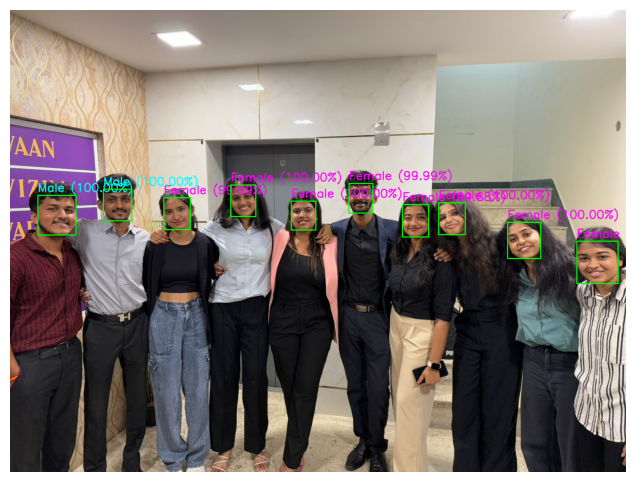

Total Faces Detected: 10
Male Predictions: 2
Female Predictions: 8


In [2]:
image_path = "Images/genequ1.jpg"
detect_and_classify(image_path)


0: 480x640 8 faces, 138.6ms
Speed: 6.6ms preprocess, 138.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


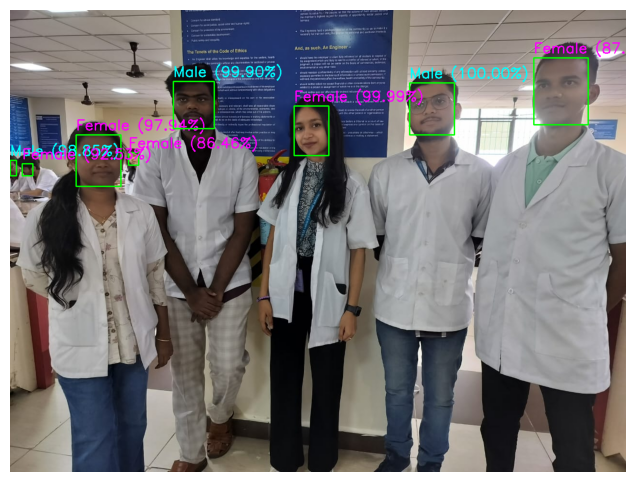

Total Faces Detected: 8
Male Predictions: 3
Female Predictions: 5


In [3]:
image_path = "Images/genequ2.jpg"
detect_and_classify(image_path)


0: 480x640 5 faces, 150.5ms
Speed: 3.5ms preprocess, 150.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


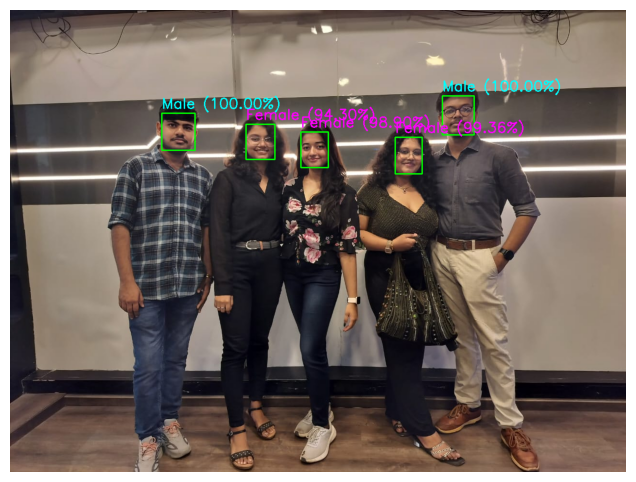

Total Faces Detected: 5
Male Predictions: 2
Female Predictions: 3


In [4]:
image_path = "Images/genequ3.jpg"
detect_and_classify(image_path)